In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

print(tf.__version__)

2.8.0


#### Cоздание моделей для прогнозирования топливной экономичности автомобилей конца 1970-х и начала 1980-х годов.

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
raw_dataset.shape

(398, 8)

In [4]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [17]:
df = raw_dataset.copy()
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [18]:
df.isna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [19]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.shape

(392, 8)

In [22]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [23]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [24]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [13]:
X = df.copy()
y = X.pop('MPG')

In [14]:
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [15]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 392, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [26]:
df[['MPG', 'Cylinders', 'Displacement', 'Weight']]

,MPG,Cylinders,Displacement,Weight
0,18.0,8,307.0,3504.0
1,15.0,8,350.0,3693.0
2,18.0,8,318.0,3436.0
3,16.0,8,304.0,3433.0
4,17.0,8,302.0,3449.0
...,...,...,...,...
393,27.0,4,140.0,2790.0
394,44.0,4,97.0,2130.0
395,32.0,4,135.0,2295.0
396,28.0,4,120.0,2625.0


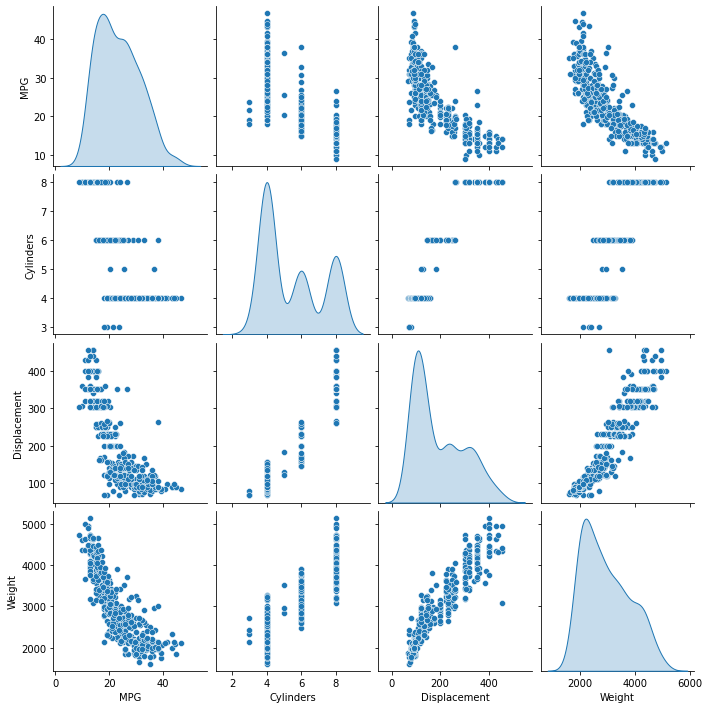

In [27]:
sns.pairplot(df[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [31]:
X.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Cylinders,392.0,5.47,1.71,3.0,4.00,4.0,8.00,8.0
Displacement,392.0,194.41,104.64,68.0,105.00,151.0,275.75,455.0
Horsepower,392.0,104.47,38.49,46.0,75.00,93.5,126.00,230.0
Weight,392.0,2977.58,849.40,1613.0,2225.25,2803.5,3614.75,5140.0
Acceleration,392.0,15.54,2.76,8.0,13.78,15.5,17.02,24.8
Model Year,392.0,75.98,3.68,70.0,73.00,76.0,79.00,82.0
Europe,392.0,0.17,0.38,0.0,0.00,0.0,0.00,1.0
Japan,392.0,0.20,0.40,0.0,0.00,0.0,0.00,1.0
USA,392.0,0.62,0.48,0.0,0.00,1.0,1.00,1.0


Нормировка

In [32]:
X.describe().transpose()[['mean', 'std']]

,mean,std
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Europe,0.173469,0.379136
Japan,0.201531,0.401656
USA,0.625000,0.484742


In [33]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [34]:
normalizer.adapt(np.array(X))

In [35]:
print(normalizer.mean.numpy())

[[   5.472  194.412  104.469 2977.584   15.541   75.98     0.173    0.202
     0.625]]


In [36]:
first = np.array(X[:1])

with np.printoptions(precision=2):
    print('Первый пример:', first)
    print()
    print('Нормализованный:', normalizer(first).numpy())

Первый пример: [[   8.  307.  130. 3504.   12.   70.    0.    0.    1.]]

Нормализованный: [[ 1.48  1.08  0.66  0.62 -1.29 -1.63 -0.46 -0.5   0.77]]


#### Построение линейной модели от лошадиных сил

In [37]:
horsepower = np.array(X_train['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(np.array(X['Horsepower']))

In [38]:
X_train['Horsepower']

338     84.0
189    120.0
100     88.0
52      76.0
49      86.0
       ...  
150     93.0
155     72.0
71      97.0
75     150.0
165    110.0
Name: Horsepower, Length: 250, dtype: float64

In [39]:
horsepower

array([ 84., 120.,  88.,  76.,  86., 105., 153.,  53., 100., 150.,  96.,
       140.,  96.,  88.,  64.,  75., 110., 105., 150., 140., 225.,  98.,
        75.,  88.,  78.,  70., 140., 170., 175.,  71., 158.,  95., 100.,
        70.,  86.,  94.,  90.,  71., 150.,  85.,  88.,  70.,  80., 110.,
        85., 210.,  90.,  86., 145.,  65.,  65.,  96.,  88.,  90.,  53.,
        70.,  90.,  52., 170.,  85.,  63., 139.,  80.,  83.,  75.,  90.,
        70.,  52.,  65.,  95.,  76.,  91., 152.,  95., 105.,  68., 150.,
        88., 107.,  61.,  85.,  97., 102., 116.,  84., 110., 112.,  80.,
        88.,  88.,  82.,  88., 100., 180., 150., 133.,  75., 215., 208.,
        63., 193.,  90., 150.,  90., 110., 105., 149.,  85.,  60.,  60.,
        90.,  75.,  48.,  95., 200.,  77.,  70.,  67.,  68.,  88., 105.,
        92., 100.,  88., 120.,  75., 100.,  81.,  80., 110.,  87., 148.,
       140.,  90., 108.,  65., 150.,  92.,  92.,  88., 145., 145.,  67.,
        46., 165.,  70., 110.,  67., 100.,  81., 13

In [40]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [41]:
horsepower[:10]

array([ 84., 120.,  88.,  76.,  86., 105., 153.,  53., 100., 150.])

In [42]:
horsepower_model.predict(horsepower[:10])

array([[-0.747],
       [ 0.567],
       [-0.601],
       [-1.039],
       [-0.674],
       [ 0.019],
       [ 1.771],
       [-1.879],
       [-0.163],
       [ 1.662]], dtype=float32)

In [43]:
y_train.values[:10]

array([27.2, 15.5, 18. , 30. , 23. , 23.2, 14. , 33. , 19. , 13. ])

In [44]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [45]:
%%time
history = horsepower_model.fit(
    X_train['Horsepower'],
    y_train,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
7/7 [==============================] - 1s 29ms/step - loss: 23.5932 - val_loss: 22.1422
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 22.8561 - val_loss: 21.4639
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 22.1099 - val_loss: 20.7776
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 21.3754 - val_loss: 20.0940
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 20.6503 - val_loss: 19.4115
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 19.9151 - val_loss: 18.7277
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 19.1813 - val_loss: 18.0448
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 18.4420 - val_loss: 17.3585
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 17.7148 - val_loss: 16.6775
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 16.9759 - val_loss: 15.9976
Epoch 11

7/7 [==============================] - 0s 8ms/step - loss: 3.7009 - val_loss: 4.0427
Epoch 85/100
7/7 [==============================] - 0s 6ms/step - loss: 3.6999 - val_loss: 4.0442
Epoch 86/100
7/7 [==============================] - 0s 8ms/step - loss: 3.7038 - val_loss: 4.0418
Epoch 87/100
7/7 [==============================] - 0s 8ms/step - loss: 3.7000 - val_loss: 4.0409
Epoch 88/100
7/7 [==============================] - 0s 7ms/step - loss: 3.6998 - val_loss: 4.0363
Epoch 89/100
7/7 [==============================] - 0s 6ms/step - loss: 3.6995 - val_loss: 4.0301
Epoch 90/100
7/7 [==============================] - 0s 7ms/step - loss: 3.7093 - val_loss: 4.0343
Epoch 91/100
7/7 [==============================] - 0s 7ms/step - loss: 3.7122 - val_loss: 4.0317
Epoch 92/100
7/7 [==============================] - 0s 7ms/step - loss: 3.7018 - val_loss: 4.0355
Epoch 93/100
7/7 [==============================] - 0s 7ms/step - loss: 3.7229 - val_loss: 4.0486
Epoch 94/100
7/7 [===============

In [46]:
history.history

{'loss': [23.59322738647461,
  22.85611343383789,
  22.109899520874023,
  21.37543296813965,
  20.65033721923828,
  19.915115356445312,
  19.181304931640625,
  18.442041397094727,
  17.71480941772461,
  16.975929260253906,
  16.237712860107422,
  15.50922966003418,
  14.756743431091309,
  14.029083251953125,
  13.296943664550781,
  12.541884422302246,
  11.79977035522461,
  11.065762519836426,
  10.34619140625,
  9.615930557250977,
  8.887110710144043,
  8.180147171020508,
  7.516485691070557,
  6.920669078826904,
  6.349605560302734,
  5.869304656982422,
  5.4356184005737305,
  5.09190559387207,
  4.780086994171143,
  4.529749393463135,
  4.312999725341797,
  4.131598472595215,
  3.9900057315826416,
  3.90690541267395,
  3.8544158935546875,
  3.8210692405700684,
  3.7969164848327637,
  3.781637668609619,
  3.758286952972412,
  3.7480709552764893,
  3.742410182952881,
  3.7359719276428223,
  3.731471538543701,
  3.723849296569824,
  3.730743169784546,
  3.7149040699005127,
  3.71157765

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.702126,4.057589,95
96,3.700444,4.054974,96
97,3.701888,4.055653,97
98,3.702794,4.047507,98
99,3.705718,4.041624,99


In [49]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)

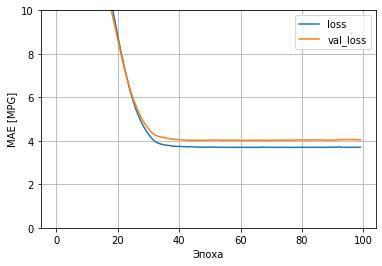

In [50]:
plot_loss(history)

In [51]:
horsepower_model.evaluate(X_test['Horsepower'], y_test, verbose=0)

4.310801982879639

In [52]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(X_test['Horsepower'], 
                                                             y_test, verbose=0)

In [53]:
test_results

{'horsepower_model': 4.310801982879639}

In [54]:
tf.linspace(0.0, 250, 251)

<tf.Tensor: shape=(251,), dtype=float32, numpy=
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
   

In [55]:
x = tf.linspace(0.0, 250, 251)
prediction = horsepower_model.predict(x)

In [60]:
def plot_horsepower(x_train, y_train, x, prediction):
    plt.scatter(x_train, y_train, label='Data')
    plt.plot(x, prediction, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

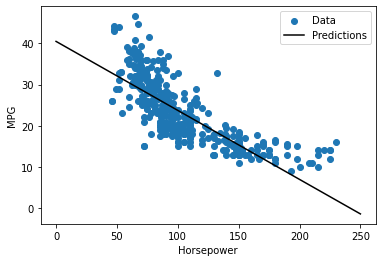

In [61]:
plot_horsepower(X['Horsepower'], y, x, prediction)

#### Построение линейной модели

In [62]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [63]:
linear_model.predict(X_train[:10])

array([[ 0.269],
       [ 0.596],
       [-0.541],
       [-2.66 ],
       [-0.151],
       [ 0.105],
       [ 1.048],
       [ 0.21 ],
       [ 0.291],
       [ 0.752]], dtype=float32)

In [64]:
y_train[:10]

338    27.2
189    15.5
100    18.0
52     30.0
49     23.0
271    23.2
65     14.0
181    33.0
33     19.0
137    13.0
Name: MPG, dtype: float64

In [65]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [66]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
7/7 [==============================] - 0s 22ms/step - loss: 23.5775 - val_loss: 21.9921
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 22.5661 - val_loss: 21.2640
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 21.5821 - val_loss: 20.6332
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 20.6373 - val_loss: 19.9532
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 19.6148 - val_loss: 19.2438
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 18.6731 - val_loss: 18.5045
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 17.7317 - val_loss: 17.7618
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 16.8323 - val_loss: 17.1140
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 16.1332 - val_loss: 16.5025
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 15.4513 - val_loss: 15.9516
Epoch 1

7/7 [==============================] - 0s 7ms/step - loss: 2.3320 - val_loss: 2.9864
Epoch 85/100
7/7 [==============================] - 0s 8ms/step - loss: 2.3369 - val_loss: 2.9768
Epoch 86/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3436 - val_loss: 2.9847
Epoch 87/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3643 - val_loss: 2.9800
Epoch 88/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3356 - val_loss: 2.9592
Epoch 89/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3493 - val_loss: 2.9269
Epoch 90/100
7/7 [==============================] - 0s 6ms/step - loss: 2.3367 - val_loss: 2.9259
Epoch 91/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3332 - val_loss: 2.9255
Epoch 92/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3189 - val_loss: 2.9430
Epoch 93/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3428 - val_loss: 2.9362
Epoch 94/100
7/7 [===============

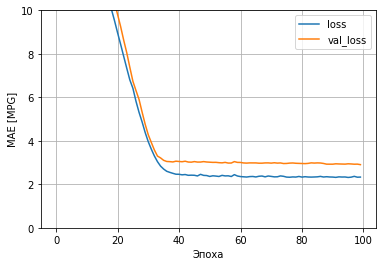

In [67]:
plot_loss(history)

In [68]:
test_results['linear_model'] = linear_model.evaluate(X_test, y_test, verbose=0)

In [69]:
test_results

{'horsepower_model': 4.310801982879639, 'linear_model': 2.611457586288452}

#### Построение многойлойного персептрона

In [70]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [71]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                640       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [72]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=300)

CPU times: total: 13.1 s
Wall time: 11 s


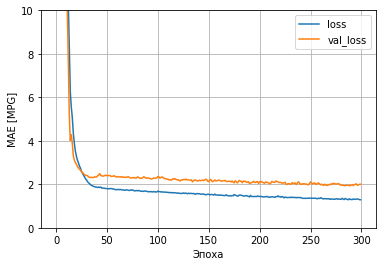

In [73]:
plot_loss(history)

In [74]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=300)

CPU times: total: 14.1 s
Wall time: 11.6 s


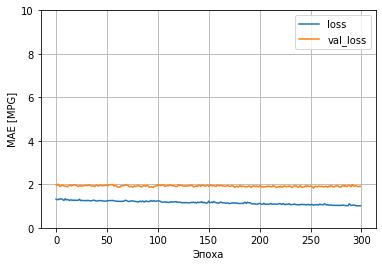

In [75]:
plot_loss(history)

In [76]:
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)

In [77]:
test_results

{'horsepower_model': 4.310801982879639,
 'linear_model': 2.611457586288452,
 'dnn_model': 2.132096767425537}

In [78]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.310802
linear_model,2.611458
dnn_model,2.132097


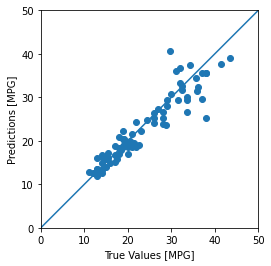

In [79]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

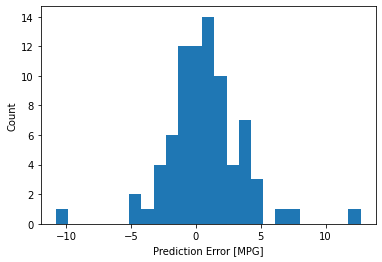

In [80]:
error = y_test - test_predictions
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

### Эксперименты с моделями

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300)
plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

### Можно сделать больше эпох

In [84]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [85]:
log_dir

'logs/fit/20230204-115929'

In [86]:
dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=1, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

Epoch 1/300
8/8 [==============================] - 1s 29ms/step - loss: 23.1006 - val_loss: 21.8980
Epoch 2/300
8/8 [==============================] - 0s 14ms/step - loss: 22.3430 - val_loss: 21.0347
Epoch 3/300
8/8 [==============================] - 0s 16ms/step - loss: 21.4718 - val_loss: 20.0278
Epoch 4/300
8/8 [==============================] - 0s 15ms/step - loss: 20.4171 - val_loss: 18.7523
Epoch 5/300
8/8 [==============================] - 0s 15ms/step - loss: 19.0622 - val_loss: 17.0977
Epoch 6/300
8/8 [==============================] - 0s 16ms/step - loss: 17.3454 - val_loss: 15.0251
Epoch 7/300
8/8 [==============================] - 0s 18ms/step - loss: 15.4296 - val_loss: 13.1211
Epoch 8/300
8/8 [==============================] - 0s 18ms/step - loss: 13.3296 - val_loss: 11.2268
Epoch 9/300
8/8 [==============================] - 0s 16ms/step - loss: 10.8788 - val_loss: 9.0555
Epoch 10/300
8/8 [==============================] - 0s 15ms/step - loss: 8.1462 - val_loss: 6.4845
Ep

8/8 [==============================] - 0s 20ms/step - loss: 1.6722 - val_loss: 1.7333
Epoch 84/300
8/8 [==============================] - 0s 16ms/step - loss: 1.6874 - val_loss: 1.7592
Epoch 85/300
8/8 [==============================] - 0s 12ms/step - loss: 1.6839 - val_loss: 1.7312
Epoch 86/300
8/8 [==============================] - 0s 14ms/step - loss: 1.6642 - val_loss: 1.7405
Epoch 87/300
8/8 [==============================] - 0s 16ms/step - loss: 1.6816 - val_loss: 1.7145
Epoch 88/300
8/8 [==============================] - 0s 13ms/step - loss: 1.6755 - val_loss: 1.7311
Epoch 89/300
8/8 [==============================] - 0s 12ms/step - loss: 1.6644 - val_loss: 1.7665
Epoch 90/300
8/8 [==============================] - 0s 12ms/step - loss: 1.6544 - val_loss: 1.7222
Epoch 91/300
8/8 [==============================] - 0s 12ms/step - loss: 1.6510 - val_loss: 1.7296
Epoch 92/300
8/8 [==============================] - 0s 13ms/step - loss: 1.6471 - val_loss: 1.7163
Epoch 93/300
8/8 [=====

8/8 [==============================] - 0s 19ms/step - loss: 1.4838 - val_loss: 1.6914
Epoch 166/300
8/8 [==============================] - 0s 20ms/step - loss: 1.4758 - val_loss: 1.7220
Epoch 167/300
8/8 [==============================] - 0s 29ms/step - loss: 1.4849 - val_loss: 1.7131
Epoch 168/300
8/8 [==============================] - 0s 23ms/step - loss: 1.4633 - val_loss: 1.7642
Epoch 169/300
8/8 [==============================] - 0s 17ms/step - loss: 1.4718 - val_loss: 1.7303
Epoch 170/300
8/8 [==============================] - 0s 16ms/step - loss: 1.4853 - val_loss: 1.6941
Epoch 171/300
8/8 [==============================] - 0s 12ms/step - loss: 1.5034 - val_loss: 1.7698
Epoch 172/300
8/8 [==============================] - 0s 11ms/step - loss: 1.4657 - val_loss: 1.6890
Epoch 173/300
8/8 [==============================] - 0s 12ms/step - loss: 1.4535 - val_loss: 1.7740
Epoch 174/300
8/8 [==============================] - 0s 12ms/step - loss: 1.4574 - val_loss: 1.7292
Epoch 175/300


8/8 [==============================] - 0s 15ms/step - loss: 1.3077 - val_loss: 1.8164
Epoch 248/300
8/8 [==============================] - 0s 14ms/step - loss: 1.3137 - val_loss: 1.8720
Epoch 249/300
8/8 [==============================] - 0s 14ms/step - loss: 1.3316 - val_loss: 1.8195
Epoch 250/300
8/8 [==============================] - 0s 15ms/step - loss: 1.3303 - val_loss: 1.8331
Epoch 251/300
8/8 [==============================] - 0s 14ms/step - loss: 1.3077 - val_loss: 1.8630
Epoch 252/300
8/8 [==============================] - 0s 13ms/step - loss: 1.3219 - val_loss: 1.8033
Epoch 253/300
8/8 [==============================] - 0s 15ms/step - loss: 1.2843 - val_loss: 1.8408
Epoch 254/300
8/8 [==============================] - 0s 14ms/step - loss: 1.2813 - val_loss: 1.8422
Epoch 255/300
8/8 [==============================] - 0s 11ms/step - loss: 1.2729 - val_loss: 1.8339
Epoch 256/300
8/8 [==============================] - 0s 12ms/step - loss: 1.2847 - val_loss: 1.8643
Epoch 257/300


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001A78F3458B0>
Traceback (most recent call last):
  File "D:\anaconda\envs\nn_curse\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
log_dir = "logs/fit/128-64-relu"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

### Добавление dropout

In [ ]:
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(1)
])

dnn_model.compile(loss='mean_squared_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

log_dir = "logs/fit/128-do-64-do"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

In [ ]:
dnn_model = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.8),
    layers.Dense(1)
])

dnn_model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

In [ ]:
dnn_model = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.8),
    layers.Dense(1)
])

dnn_model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.RMSprop(0.01) )

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=300, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=0)

## Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
rf = GSCV.best_estimator_
rf

In [ ]:
rf = RandomForestRegressor(GSCV.best_params_)
rf

In [ ]:
rf = RandomForestRegressor(criterion='squared_error', max_depth=6, 
                           max_features='auto', n_estimators=500)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
test_predictions = rf.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rf.predict(X_test)

In [ ]:
np.mean((y_test - np.mean(y_test))*(y_test - np.mean(y_test)))

In [ ]:
prediction=rf.predict(X_test)

In [ ]:
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
pd.DataFrame(GSCV.cv_results_)

In [ ]:
plt.hist(pd.DataFrame(GSCV.cv_results_)['mean_test_score'])

### Лассо

In [ ]:
lassso = Lasso(random_state = 42)
param_grid = {
   'alpha': np.linspace(0, 1, 100)
}
GSCV = GridSearchCV(estimator=lassso, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
model=GSCV.best_estimator_

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
prediction=model.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

### k ближайших соседей

In [ ]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))